# Anomaly Detection

## Import required modules

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

## Familiarization Task

In [14]:
data = pd.read_csv("dataset/BATADAL_dataset03.csv", index_col="DATETIME")
data.index = pd.to_datetime(data.index)
data

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0
2014-06-01 05:00:00,0.791114,2.773177,5.155802,3.937262,3.191528,5.322743,3.988906,94.135468,1,94.153748,...,76.848953,31.443146,67.832695,30.366247,64.369881,30.366247,60.329407,33.749393,32.849392,0
2014-06-01 06:00:00,1.186589,3.536068,4.983953,3.018011,2.859591,5.066728,2.977463,95.258003,1,95.276611,...,75.703812,29.219223,87.435600,30.004425,63.333805,30.004425,58.606335,31.808870,30.908869,0
2014-06-01 07:00:00,1.420449,3.872926,4.747458,3.581882,2.359944,5.152646,2.953742,96.947456,1,96.966560,...,73.617569,29.160114,86.829086,26.536455,62.231846,26.414701,68.808609,31.700340,30.800341,0
2014-06-01 08:00:00,1.534827,4.138434,4.417932,3.959265,1.748313,5.395835,3.228596,96.970291,1,96.989403,...,74.182251,29.420120,89.644714,26.605623,60.656143,26.484545,69.221718,31.939442,31.039440,0


In [15]:
data.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

We can see that there are several kinds of signal readings provided in the SCADA data. The description of each signal is provided in https://batadal.net/images/rules.pdf. Basically the types of signal are:

* L_T1 - L_T7: depicts the water level of Tank 1 to 7
* F_PU1 - F_PU11: depicts the flow through Pump 1 - Pump 11
* S_PU1 - S_PU11: depicts the status of Pump 1 - Pump 11 with value 0 (OFF) or 1 (ON)
* F_V2: depicts the flow through Valve 2
* S_V2: depicts the status of Valve 2 with value 0 (CLOSED) or 1 (OPEN)
* P_JXXX: depicts the suction and discharge pressure of a pumping station which the junction is located

In [16]:
start_time = 0 # the start time
time_span = 160 # how much time to plot

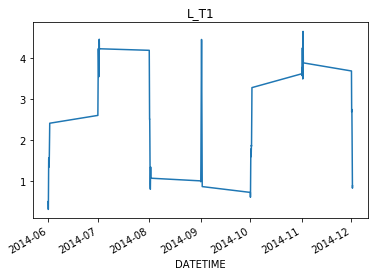

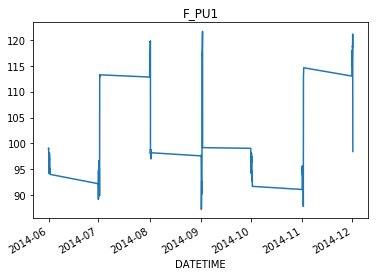

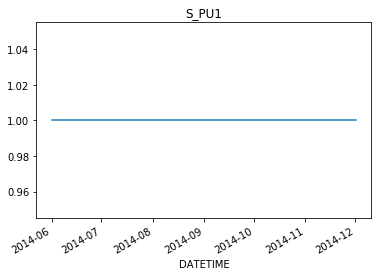

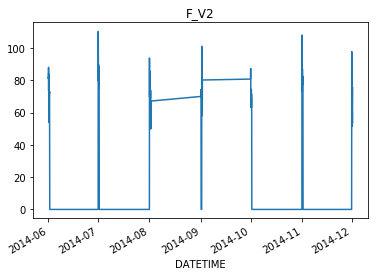

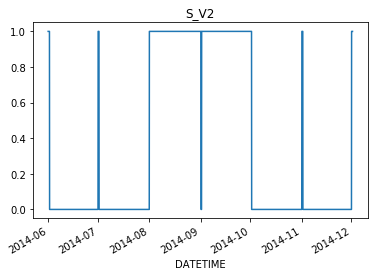

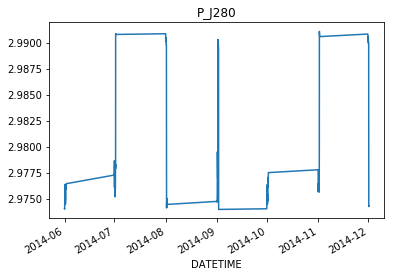

In [6]:
for signal in ["L_T1", "F_PU1", "S_PU1", "F_V2", "S_V2", "P_J280"]:
    plt.figure()
    data[signal][start_time:start_time+time_span].plot()
    plt.title(signal)

### Correlation

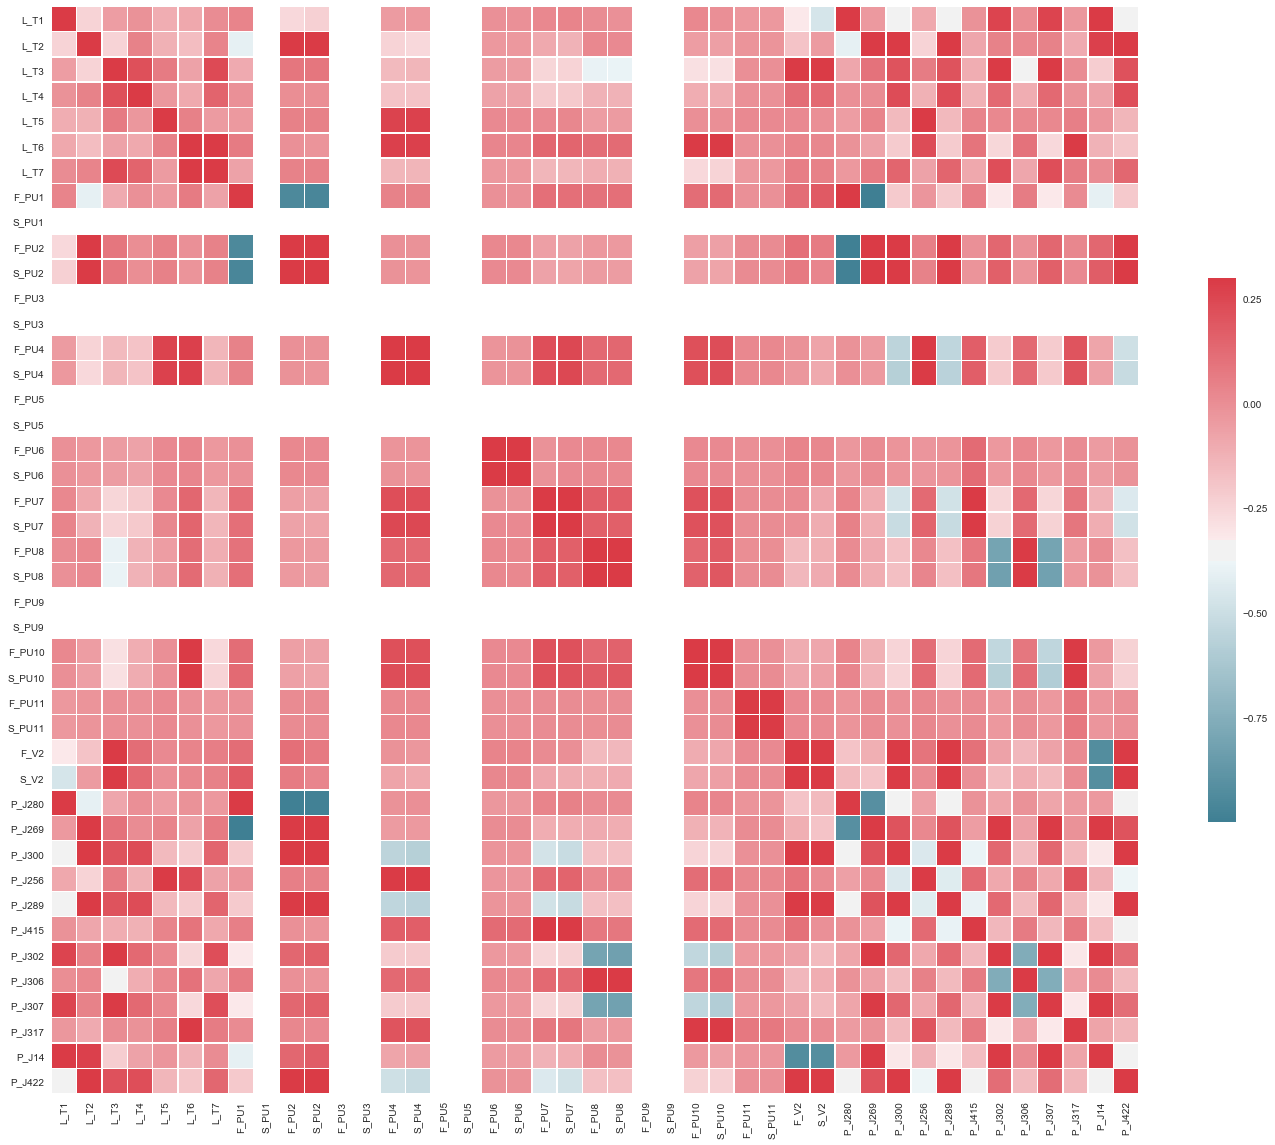

In [12]:
temp = data.drop("ATT_FLAG",axis=1,inplace=False)

sns.set(style="white")
# Compute the correlation matrix
corr = temp.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(corr, cmap=cmap, vmax=0.3,
            square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

### Prediction Model using Autoregression

#### Autocorrelation plot

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


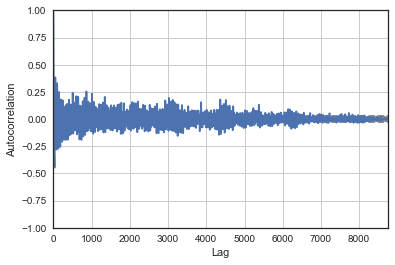

In [28]:
autocorrelation_plot(data['L_T1'])

Lag: 37
Coefficients: [ 4.28791538e-01  1.71433160e+00 -9.30773460e-01  2.67341076e-01
 -7.14957657e-02 -1.02241316e-01  3.33309274e-02 -4.50823472e-02
  8.75216892e-05  9.29861388e-02 -4.41530823e-02  2.49594128e-02
 -5.53992100e-03 -7.19882517e-02 -4.72564474e-02  7.56041309e-02
  8.43370057e-03  1.07379747e-02 -5.04435942e-02  7.00790522e-03
  1.01333927e-02 -3.45236499e-02  1.03691217e-01  1.13538254e-03
  1.16663433e-02 -8.64861508e-02 -1.85555396e-02 -4.50382295e-02
  3.95669070e-02  1.26009175e-02  3.90865436e-02  1.78719887e-02
 -2.77130893e-02 -3.66664831e-02  3.48586185e-03  4.70029237e-02
  3.75131407e-02 -7.12803451e-02]
predicted=1.073243, expected=0.869968
predicted=0.684354, expected=0.663842
predicted=0.599365, expected=1.031355
predicted=0.822821, expected=1.591397
predicted=1.265122, expected=2.480027
predicted=1.811987, expected=3.203121
predicted=2.353368, expected=3.657291
predicted=2.839373, expected=4.082142
predicted=3.226049, expected=4.450097
predicted=3.48889

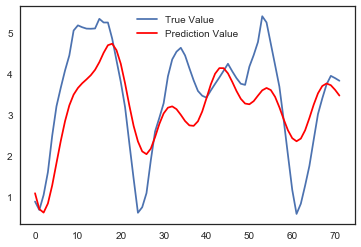

In [39]:
# split dataset
series = data['L_T2']
X = series.values
train, test = X[1:len(X)-72], X[len(X)-72:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test, label="True Value")
plt.plot(predictions, color='red',label="Prediction Value")
plt.legend()
plt.show()